# IS 362 – Week 8 Assignment

### Tasks:
Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables.
Here is a link to the “Auto MPG” dataset in the UC Irvine data repository: https://archive.ics.uci.edu/ml/datasets/Auto+MPG.
1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.
2. Review the data and the provided data set description.
3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.
4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.
5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’
6. Create a bar chart that shows the distribution for cylinders.
7. Create a scatterplot that shows the relationship between horsepower and weight.
8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

##### 1. Let's import pandas and seaborn

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### 2. Load the UC Irvine data repository

In [73]:
uc_header = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car name']
uc_data = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', uc_header= None, names=uc_header)
cols = uc_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
uc_data = uc_data[cols]
uc_data

,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,1
1,"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,1
2,"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,1
3,"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,1
4,"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,1
5,"""ford galaxie 500""",15.0,8,429.0,198.0,4341.0,10.0,70,1
6,"""chevrolet impala""",14.0,8,454.0,220.0,4354.0,9.0,70,1
7,"""plymouth fury iii""",14.0,8,440.0,215.0,4312.0,8.5,70,1
8,"""pontiac catalina""",14.0,8,455.0,225.0,4425.0,10.0,70,1
9,"""amc ambassador dpl""",15.0,8,390.0,190.0,3850.0,8.5,70,1


##### 3. I noticed that there is a question mark (?) displayed in the place where the value is missing. Let's change (?) to NaN. Change the origin to the following:
- ** 1 = USA **
- ** 2 = ASIA **
- ** 3 = EUROPE **

In [76]:
uc_data = uc_data.replace(to_replace='?', value=np.nan)
uc_data['horsepower'] = uc_data['horsepower'].astype(float)
uc_data['origin'].replace(1, 'USA', inplace=True)
uc_data['origin'].replace(2, 'Asia', inplace=True)
uc_data['origin'].replace(3, 'Europe', inplace=True)
uc_data

,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,USA
5,"""ford galaxie 500""",15.0,8,429.0,198.0,4341.0,10.0,70,USA
6,"""chevrolet impala""",14.0,8,454.0,220.0,4354.0,9.0,70,USA
7,"""plymouth fury iii""",14.0,8,440.0,215.0,4312.0,8.5,70,USA
8,"""pontiac catalina""",14.0,8,455.0,225.0,4425.0,10.0,70,USA
9,"""amc ambassador dpl""",15.0,8,390.0,190.0,3850.0,8.5,70,USA


##### 4. Create a bar chart for the distribution of cylinders

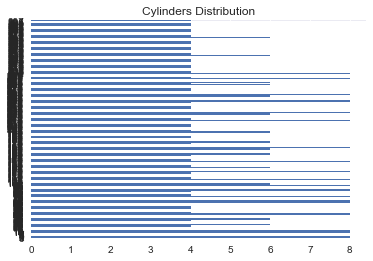

In [79]:
uc_data['cylinders'].plot(kind='barh', title='Cylinders Distribution')
uc_data.groupby('cylinders')

##### 5. Create a scatterplot that shows the relationship between horsepower and weight

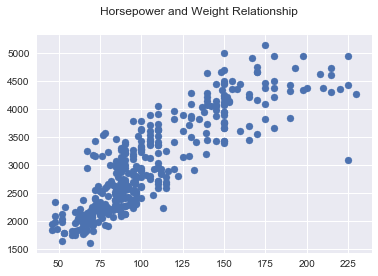

In [83]:
plt.scatter(uc_data['horsepower'], uc_data['weight'])
plt.suptitle('Horsepower and Weight Relationship')
plt.show()

##### 6. Let's create a beautiful graph by using seaborn

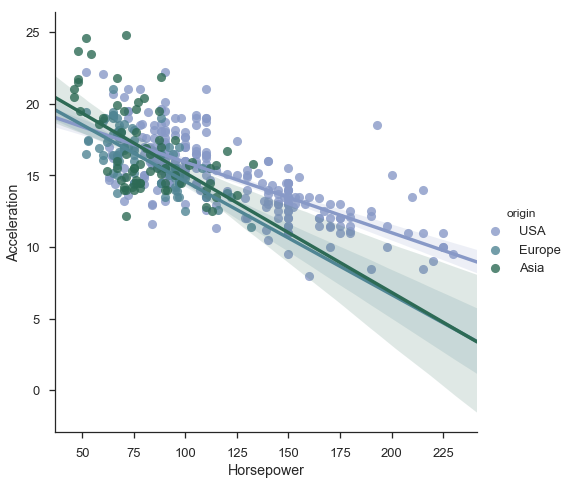

In [95]:
sns.set(style="ticks", context="talk")
acchorse = uc_data[['horsepower', 'acceleration', 'origin']]
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x='horsepower', y='acceleration', hue='origin', data=acchorse, palette=pal, size=7)
g.set_axis_labels("Horsepower", "Acceleration")
sns.plt.show()

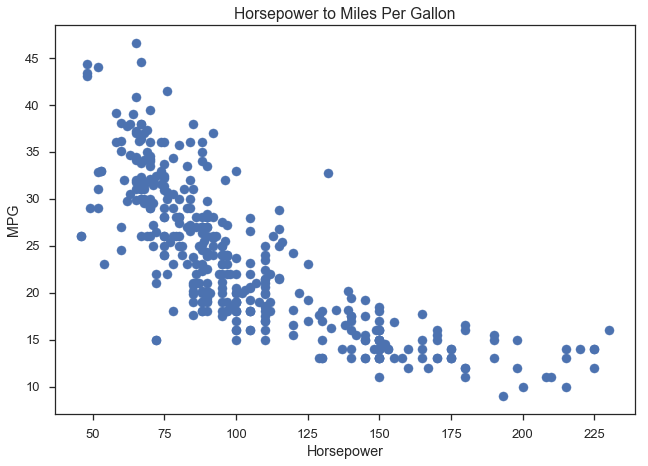

In [88]:
plt.scatter(uc_data['horsepower'], uc_data['mpg'])
plt.title('Horsepower to Miles Per Gallon')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

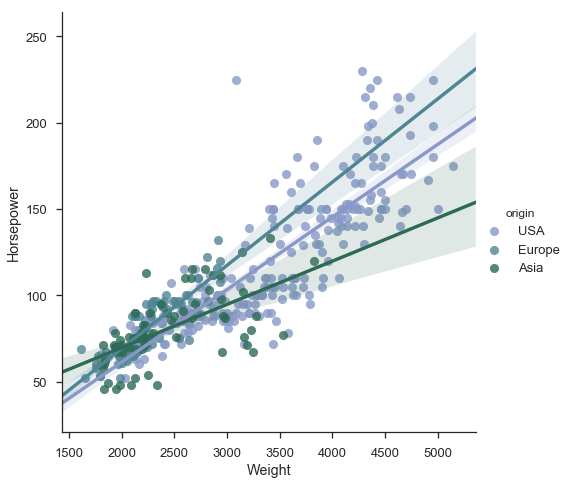

In [96]:
sns.set(style="ticks", context="talk")
acchorse = uc_data[['weight', 'horsepower', 'origin']]
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x='weight', y='horsepower', hue='origin', data=acchorse, palette=pal, size=7)
g.set_axis_labels("Weight", "Horsepower")
sns.plt.show()